#Projeto Corte Minimo Karger
###Grupo: Vitor Zimbrunes Pamplona, Yan borges Simões de Araújo
###Matrícula: 20190038570, 20190036216
###Data: 03/05/2023
###Última alteração: 20/05/2023

In [ ]:
import numpy as np
import random as ra
import copy
import matplotlib.pyplot as plt

In [ ]:
class grafo:
  def __init__ (self, filename):
    f = open(filename , 'r')
    n = int(f.readline())

    self.n = n
    self.M = [[0 for _ in range(n)] for _ in range(n)]
    self.L = [[] for _ in range(n)]
    self.E = []
    self.v = list(np.arange(len(self.M)))

    l = 0
    for line in f:
      line.strip()
      numeros = line.split()
      c = 0
      for i in numeros:
        self.M[l][c] = int(i)
        if(self.M[l][c] > 0):
          self.L[l].append(c)
        c += 1
      l += 1

    for i in range(len(self.M)):
      for j in range(len(self.M)):
        if(self.M[i][j] == 1):
          self.E.append([i,j])

    for i in range(len(self.E)):
      self.E[i] = sorted(self.E[i])

    for x in self.E:
      if(self.E.count(x) > 1):
        self.E.pop(self.E.index(x))

    self.E_new = sorted(self.E)

    f.close()

  def show(self):
    print(self.M)
    print(self.L)
    print(self.E_new)
    print(self.v)

In [ ]:
g = grafo("/content/graph_type1_1")

In [ ]:
g.show()

[[0, 0, 1, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]
[[2, 3, 5], [4], [0, 6], [0, 4], [1, 3, 7], [0, 8, 9], [2], [4], [5], [5]]
[[0, 2], [0, 3], [0, 3], [0, 5], [1, 4], [1, 4], [2, 6], [3, 4], [4, 7], [5, 8], [5, 9]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#Karger teste

In [ ]:
class Karger:
  def __init__(self, grafo, Niter):
    self.grafo = grafo
    self.Niter = Niter

  def corte_minimo(self):
    min_cut = float('inf')
    for _ in range(self.Niter):
      cut = self.karger_min_cut()
      min_cut = min(min_cut, cut)
    return min_cut

  def karger_min_cut(self):
    vertices = self.grafo.v
    edges = copy.deepcopy(self.grafo.E_new)

    for _ in range(len(vertices) - 2):
      edge = ra.choice(edges)
      u = edge[0]
      v = edge[1]
      self.contract_edge(u, v, vertices, edges)

    return len(edges)

  def contract_edge(self, u, v, vertices, edges):
    merged_vertex = max(vertices) + 1
    vertices.remove(u)
    vertices.remove(v)
    vertices.append(merged_vertex)

    new_edges = []
    for edge in edges:
      if edge[0] == u or edge[0] == v or edge[1] == u or edge[1] == v:
        if edge[0] != u and edge[0] != v:
          new_edges.append((merged_vertex, edge[0]))
        if edge[1] != u and edge[1] != v:
          new_edges.append((merged_vertex, edge[1]))
      else:
        new_edges.append(edge)

    edges.clear()
    edges.extend(new_edges)

In [ ]:
K = Karger(g, 10)
print(K.corte_minimo())

1


#Algoritmo Ingênuo

In [ ]:
class Ingenuo:
  def __init__(self, grafo, Niter):
    self.grafo = grafo
    self.Niter = Niter

  def corte_minimo(self):
    min_cut = float('inf')
    for _ in range(self.Niter):
      cut = self.calculate_cut()
      min_cut = min(min_cut, cut)
    return min_cut

  def calculate_cut(self):
    vertices = self.grafo.v
    edges = copy.deepcopy(self.grafo.E_new)

    group1 = ra.sample(vertices, len(vertices))

    cut_size = 0
    for edge in edges:
      u, v = edge[0], edge[1]
      if (u in group1) or (v in group1):
        cut_size += 1

    return cut_size

In [ ]:
i = Ingenuo(g, 10)
print(i.corte_minimo())

0


#Análise Empírica

In [ ]:
class Analysis:
  def __init__(self, grafo, filename):
    f = open(filename , 'r')
    self.corte_ideal = int(f.readline())
    f.close()
    self.grafo = grafo

  def run_analysis(self, Nitermax, Nexec):
    iterations = np.arange(1, Nitermax + 1)
    prob_karger = []
    prob_ingenuo = []
    self.Nexec = Nexec

    for Niter in iterations:
      karger_success = 0
      ingenuo_success = 0

      for _ in range(self.Nexec):
        karger = Karger(self.grafo, Niter)
        ingenuo = Ingenuo(self.grafo, Niter)

        if karger.corte_minimo() == self.corte_ideal:
          karger_success += 1

        if ingenuo.corte_minimo() == self.corte_ideal:
          ingenuo_success += 1

      prob_karger.append(karger_success /self.Nexec)
      prob_ingenuo.append(ingenuo_success /self.Nexec)

    # Plotting the chart
    plt.plot(iterations, prob_ingenuo, label='Ingenuo Algorithm')
    plt.plot(iterations, prob_karger, label='Karger Algorithm')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability of Finding Minimum Cut')
    plt.title('Comparison of Karger and Ingenuo Algorithms')
    plt.legend()
    plt.show()

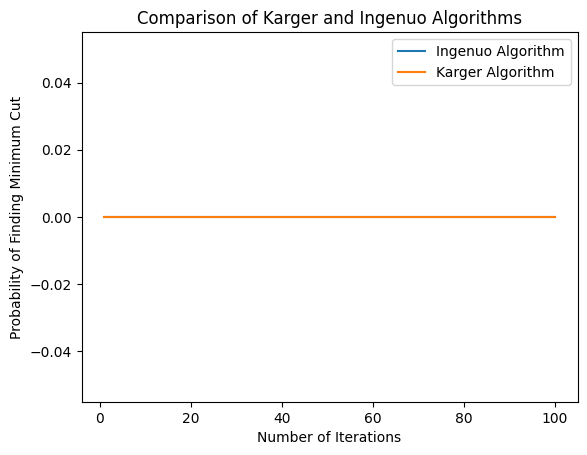

CPU times: user 30.8 s, sys: 163 ms, total: 30.9 s
Wall time: 31.1 s


In [ ]:
analysis = Analysis(g, '/content/graph_type1_1 out')
%time analysis.run_analysis(100, 100)